In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import datetime
from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_csv('brooklyn99_episodes.csv')

In [3]:
df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0


# Director whose episodes which got most views

In [4]:
df[['directed_by','us_viewers']].groupby(['directed_by']).sum().reset_index().sort_values(['us_viewers'],ascending = False).head(1)

,directed_by,us_viewers
38,Michael McDonald,30400000.0


In [5]:
df[df['directed_by']=='Michael McDonald']['us_viewers'].sum()

30400000.0

# Top 5 Director with most no. of episodes directed

In [6]:
temp_df = pd.DataFrame(df['directed_by'].value_counts().head().reset_index().rename(columns={'index':'Director','directed_by':'No. of Episodes directed'}))
temp_df

,Director,No. of Episodes directed
0,Michael McDonald,12
1,Claire Scanlon,10
2,Linda Mendoza,9
3,Dean Holland,7
4,Tristram Shapeero,5


Text(0, 0.5, 'Number of Epoisodes')

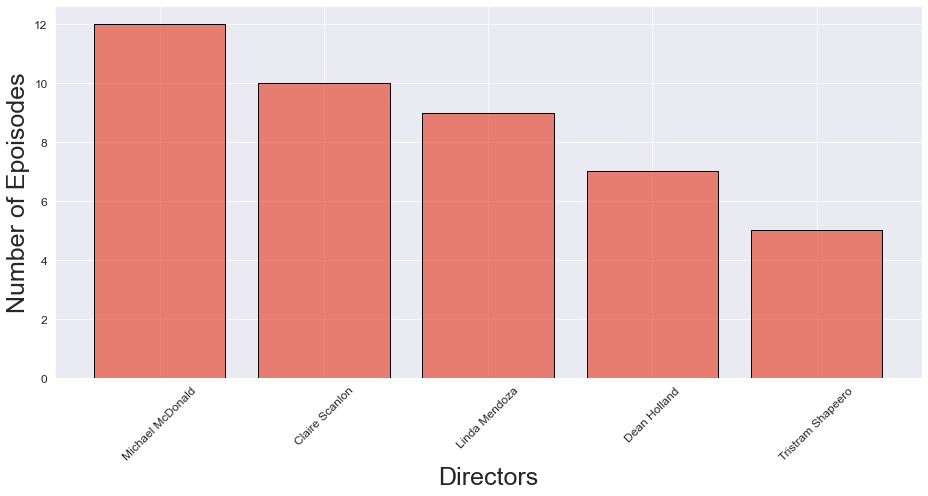

In [7]:
plt.rcParams["figure.figsize"] = [13, 7]
plt.rcParams["figure.autolayout"] = True
plt.bar(temp_df['Director'],temp_df['No. of Episodes directed'],align='center',color=(0.9, 0.2, 0.1, 0.6),edgecolor='k')
plt.xticks(rotation=45,size=12)
plt.xlabel('Directors',size=25)
plt.yticks(size=12)
plt.ylabel('Number of Epoisodes',size=25)

# Line chart of viewers vs episode

In [8]:
df['original_air_date'] = pd.to_datetime(df['original_air_date'], format='%Y-%m-%d', errors='coerce')

In [9]:
df =df.dropna(subset=['episode_num_overall','us_viewers'])

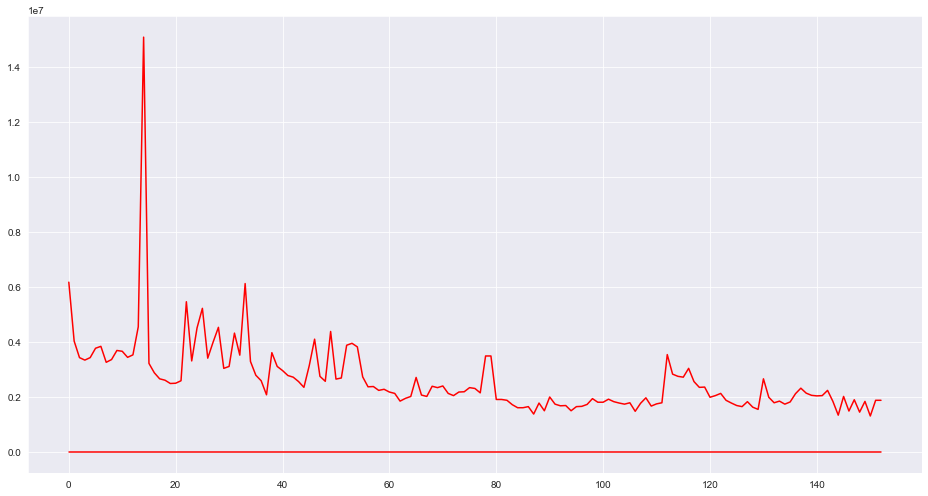

In [10]:
plt.rcParams["figure.figsize"] = [13,7]
plt.rcParams["figure.autolayout"] = True
plt.plot(df[['episode_num_overall','us_viewers']],color ='red')

In [11]:
round(df['us_viewers'].max()/df[df['us_viewers']!=df['us_viewers'].max()]['us_viewers'].mean(),2)

5.94

Episode 15 has approx 6 times more views than average views of b99 episodes


In [12]:
df[df['us_viewers']==df['us_viewers'].max()]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
14,1,15,15,Operation: Broken Feather,Julie Anne Robinson,Dan Goor & Michael Schur,2014-02-02,116.0,15070000.0


# Creating Wordcloud with most common words used

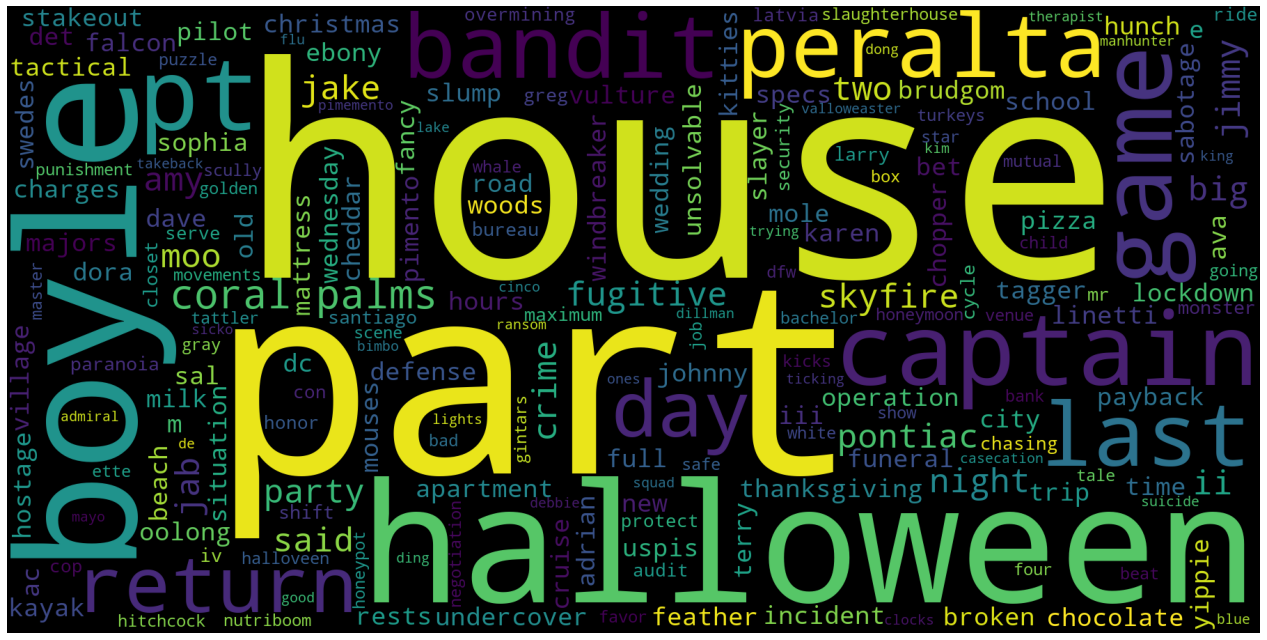

In [17]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1800, height = 900,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (18, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

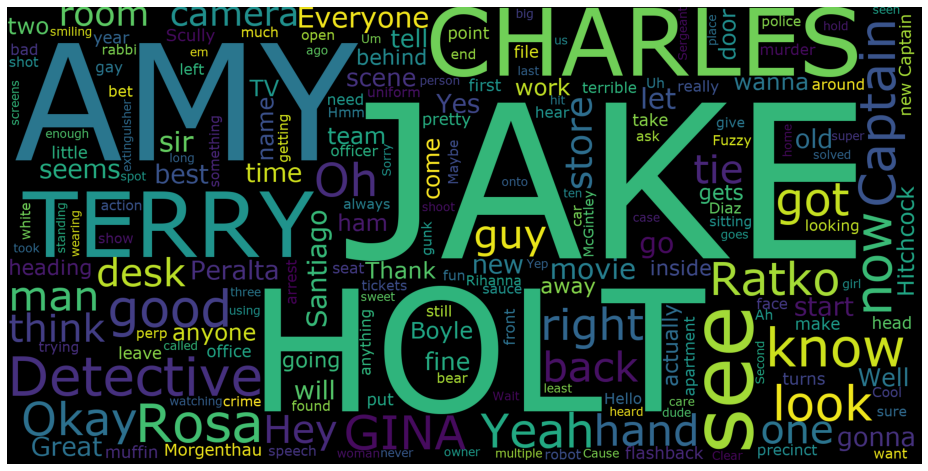

<Figure size 936x504 with 0 Axes>

In [16]:
file_content=open ("episode_1.txt").read()

wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'black',
                            width = 2000,
                            height = 1000,
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()
plt.savefig('word_cloud.png')